In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

<Axes: xlabel='job_posted_month_no'>

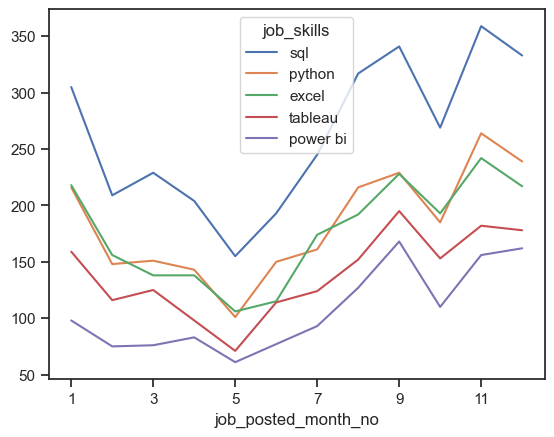

In [44]:
What_country = 'India'
df_DA_IN = df[(df['job_title_short']=='Data Analyst') & ((df['job_country']== What_country))].copy()
df_DA_IN['job_posted_month_no'] = df_DA_IN['job_posted_date'].dt.month

df_DA_IN_exploded = df_DA_IN.copy()
df_DA_IN_exploded = df_DA_IN_exploded.explode('job_skills')

df_DA_IN_pivot = df_DA_IN_exploded.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_IN_pivot.loc['Total']  = df_DA_IN_pivot.sum()
df_DA_IN_pivot = df_DA_IN_pivot[df_DA_IN_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_IN_pivot =df_DA_IN_pivot.drop('Total')
df_DA_IN_pivot.iloc[:,:5].plot(kind='line')

In [46]:
DA_total = df_DA_IN.groupby('job_posted_month_no').size()
DA_total

job_posted_month_no
1     628
2     433
3     422
4     418
5     278
6     367
7     457
8     618
9     630
10    500
11    722
12    648
dtype: int64

In [47]:
from matplotlib.ticker import PercentFormatter

df_DA_IN_percent = df_DA_IN_pivot.div(DA_total/100,axis=0)
df_DA_IN_percent = df_DA_IN_percent.iloc[:,:5]

df_DA_IN_percent = df_DA_IN_percent.reset_index()
df_DA_IN_percent['job_posted_month_no'] = pd.to_datetime(df_DA_IN_percent['job_posted_month_no'],format='%m').dt.strftime('%b')
df_DA_IN_percent = df_DA_IN_percent.set_index('job_posted_month_no')
df_DA_IN_percent 


job_skills,sql,python,excel,tableau,power bi
job_posted_month_no,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096
Feb,48.267898,34.180139,36.027714,26.789838,17.321016
Mar,54.265403,35.781991,32.701422,29.620853,18.009479
Apr,48.803828,34.210526,33.014354,23.444976,19.856459
May,55.755396,36.330935,38.129496,25.539568,21.942446
Jun,52.588556,40.871935,31.335150,31.062670,20.980926
Jul,53.610503,35.229759,38.074398,27.133479,20.350109
Aug,51.294498,34.951456,31.067961,24.595469,20.550162
Sep,54.126984,36.349206,36.190476,30.952381,26.666667


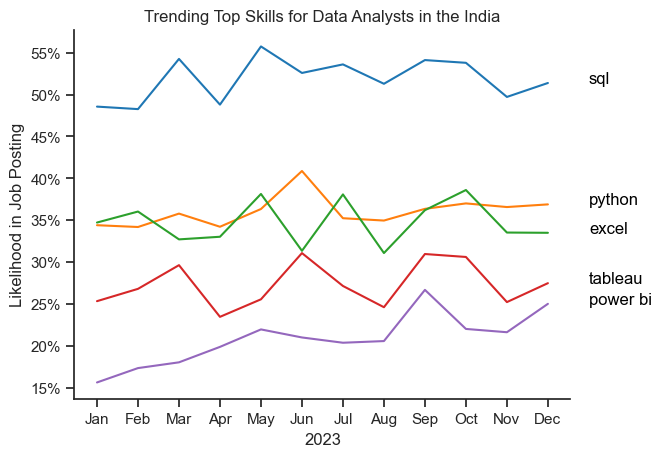

In [48]:
df_plot = df_DA_IN_percent
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title(f'Trending Top Skills for Data Analysts in the {What_country}')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(12,df_plot.iloc[-1,i],df_plot.columns[i],color='black')

# df_DA_IN_percent